# Generating random numbers #

## Randomness vs. pseudorandomness ##

The Cambridge dictionary defines «random» as: "happening, done, or chosen by chance rather than according to a plan" (you can [check yourself](http://dictionary.cambridge.org/dictionary/english/random?q=randomness)). Indeed, common sense reasoning suggests us  that we can speak of randomness when a given experience can be repeated several times, always with exactly the same modalities, yet not always giving the same result. Think for instance of the result of a coin toss, or the closing value of a stock exchange, or even the actual occurrence of rainfalls during daytime when you see a grey sky during the morning. Note that this unpredictability only concerns a specific event, that is you cannot have full confidence on any statement for the result of a single die toss, or for the closing value of a stock exchange and so on. Someone even joked about this fact, as suggested in next Figure.


![title](https://imgs.xkcd.com/comics/random_number.png)
<center>**Joking about pseudorandom simulation** [source: [XKCD](https://xkcd.com/221/)]</center>


Things are different if you consider a sequence of such events and try to formulate statements about some form of average result: you can, for instance, be more or less confident about the fact that almost a given fraction of one hundred tosses of a given coin give head. This notion of randomness is widespread even in our everyday life, so that a saying attributed to Benjamin Franklin goes "in life nothing is sure but death and taxes".

On the other hand, an electronic computer is probably the tool which is more distant from the notion of randomness: when we give it a task, say computing the sum of numbers in a spreadsheet, we expect it to solve the task without any error, thus we also expect (and typically obtain) that repeated executions ot a same task give always the same result. Besides, we are told that an electronic computer is nothing more than a mechanism, for sure a complex one, yet a mechanism only able to do what it is encoded in its circuits.

However we are faced with situations characterized by some form of uncertainty even in the results produced by a computer: the digital assistant in my smartphone doesn't always recognize vocal queries at the first attempt, commercial ads in my favourite social network are visualized withouth a predefined scheme, and the colour of bricks in my favourite block puzzle app is chosen somehow arbitrarily. Note that in these cases the apparent randomness is a key value of the progam under execution: nobody would play a game ever unchanging and, although it can be disappointing, the random behaviour of digital assistants is one of the key components enabling their behaviour. How can this be possible? In all these cases, the honest answer is: the beahviour of a computer is always the result of a program execution and thus it is purely deterministic; in spite of this, computers can be deterministically be programmed in such a way that they exhibit random behaviours. Consider for instance the next panel:

In [1]:
%matplotlib notebook

import math
from scipy import random
from ipywidgets import widgets
from IPython.display import display
import numpy as np
from IPython.display import clear_output, HTML
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.patches as patches

plt.xkcd()

button_one_toss = widgets.Button(description='Toss coin once')
button_100_tosses = widgets.Button(description='Toss coin 100 times')
button_reset = widgets.Button(description='Reset')
label_result = widgets.Label('aaa')
label_stats = widgets.Label('aaa')
results = [0, 0]

def nice_num(n):
    return n if n else 'zero'

def reset(b):
    global results
    
    results[0] = results[1] = 0
    label_stats.value = 'Results: zero heads, zero tails'
    label_result.value = 'No tosses up to now'

button_reset.on_click(reset)
reset(button_reset)

def toss(n):
    global results
    
    for i in range(n):
        toss = random.choice((0, 1))
        results[toss] += 1
    return toss

def do_one_toss(b):
    global results
    
    last_toss = toss(1)
    label_result.value = 'Tail' if last_toss else 'Head'
    label_stats.value = 'Results: {} heads, {} tails'.format(*map(nice_num, results))

button_one_toss.on_click(do_one_toss)

def do_100_tosses(b):
    global results
    
    last_toss = toss(100)
    label_result.value = 'Tail' if last_toss else 'Head'
    label_stats.value = 'Results: {} heads, {} tails'.format(*map(nice_num, results))

button_100_tosses.on_click(do_100_tosses)

widgets.VBox((widgets.HBox((button_one_toss, label_result)),
              widgets.HBox((label_stats, button_100_tosses, button_reset))))

If you hit the button "Generate coin toss", some code will "decide" whether a hypothetical fair coin should give head or tail, and display the result in the textbox next to the button. As tosses are generate, the cumulated number of both kinds of results is updated on the counters in the second row, so that you can see how the number of heads and tails approximately coincides when you perform a high – say, greater than 1000 – number of experiments (maybe using the custom button that performs one hundred experiments for you).

In all cases where it will be necessary to mark a clear distinction between «genuine» randomness we naturally observe in the world (say for instance that of a phisical die) from the «artificial» one we can simulate through computers, we will speak in the latter case of _pseudorandomness_.


## Pseudorandom generators before the computer era ##

pearson? no, come si chimava?

The first attempts to describe procedures able to automatically generate pseudorandom numbers date back to [WHEN?]. Pionieers in this fields were [WHO? WHY?]. As electronic computers became available, more concrete approaches started to be considered. In particular, John Von Neumann began his work on pseudorandomness generation while he was involved in the research activities of the Los Alamos laboratories [RIGHT NAME] during WW2. One of the first algorithms he studied led around in 1946 to the so-called _middle-square generator_, outputting a sequence of numbers in which every element is obtained squaring its predecessor and dropping from the result the leading and trailing two digits. Such a sequence is univoquely defined when its first element has been fixed, typically choosing a four-digits value. For instance, let 1461 be this initial value: the successor in the sequence would be equal to 1461 raised to the second power, that is 2134521, without its leading a trailing couple of digits, resulting in 1345. Analogously, the following value would be equal to 8090 and so on, as computable in the following panel, which also allows the use of a different initial value.

As a technical remark, note that all pseudorandom generators we will see need to store a static variable in order to retain the last generated value between two successive simulations. Such cases are smartly handled in python through the use of [generators](https://wiki.python.org/moin/Generators).

In [2]:
def middle_square_generator(seed=1461):
    curr_val = seed
    while True:
        curr_val = (curr_val**2 % 10**6) /100
        yield curr_val

In [3]:
msg = middle_square_generator(seed=1345)
msg.next()

8090

Let's also write a function returning a fixed-length random sequence for a given generator.

In [4]:
def random_sequence(gen, n):
    return [gen.next() for i in range(n)]

In [5]:
from ipywidgets import interact

class RandomTable():
    def __init__(self, data, width=None, format=None):
        if width:
            padded_data = data
            if len(data) % width:
                padded_data.extend([None]*(width-len(data)%width))
            self.data = np.array(padded_data).reshape(len(data)/width, width)
        else:
            self.data = data
        self.format = format if format else 'd'
    
    def _repr_html_(self):
        i = 1
        html = ['<table width="100%"']
        for row in self.data:
            html.append('<tr>')
            for col in row:
                col_text = '<td><i>u</i><sub>{}</sub>: {:{}}</td>'.format(i, col, self.format) \
                           if col else '<td></td>'
                html.append(col_text)
                i += 1
            html.append('</tr>')
        html.append('</table>')
        return '\n'.join(html)

def middle_square_sequence(num_items, seed):
    msg = middle_square_generator(seed)
    return random_sequence(msg, num_items)

def show_random_table(num_generations, seed):
    data = middle_square_sequence(num_generations, seed)
    table = RandomTable(data, width=10)
    return table

interact(show_random_table,
         num_generations=widgets.IntSlider(min=5, max=50, step=1, value=10),
         seed=widgets.IntSlider(min=1000, max=3000, step=1, value=1461));

u1: 1345,u2: 8090,u3: 4481,u4: 793,u5: 6288,u6: 5389,u7: 413,u8: 1705,u9: 9070,u10: 2649


The simplicity of this method results in a poor quality of its outputs. Indeed, finding an initial value giving rise to a clearly non random sequence is fairly easy: for instance, whenever the sequence starts with a number having both central digits equal to zero (such as 1001, 4005 and so on), all the remaining elements nullify. An analogous behaviour occurs once one of the generated values has this property.

There are other particular cases when the middle-square generator fails to output an acceptable sequence, for instance it can get stuck in limit cycles, that is eventually repeating the same values in a cycle of a limited number of elements. The following panel can be used in order to find some examples of such undesirable conditions. The search is simplified as the pseudorandom sequence is graphically visualized as a set of points.

<IPython.core.display.Javascript object>


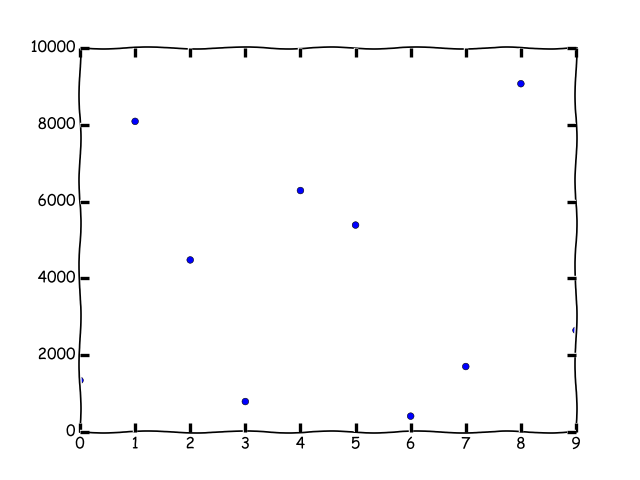

In [6]:
fig_rnd_seq, ax_rnd_seq = plt.subplots()

def show_random_sequence(num_generations, seed):
    data = middle_square_sequence(num_generations, seed)
    ax_rnd_seq.clear()
    ax_rnd_seq.plot(range(num_generations), data, 'o')
    display(fig_rnd_seq)

interact(show_random_sequence,
         num_generations=widgets.IntSlider(min = 10, max = 500, step = 10, value = 10),
         seed=widgets.IntSlider(min = 1000, max = 3000, step = 71, value = 1461));

The flaws in the middle-square generator suggest a set of desirable properties for pseudorandom generators. We will investigate such properties in the next section. However, it is worth to note that the requirements to be used in order to assess the quality of a pseudorandom generator are obviously linked to the context in which the generator itself is applied: nobody would probably bother that much if, for instance, a solitaire game installed in a smartphone would use a relatively poor pseudorandom generator to set the color of its bricks. Things would be different in case such a generator be used for shuffling a virtual deck of cards in an online gambling site, where bets are placed using real money.

## Modern pseudorandom generators ##

Despite its harmless simplicity and its poor performance, the middle-square generator introduced in previous section computes his output precisely in the same way of modern and more reliable generators: each element in the sequence is obtained applying a fixed function to its predecessor, and the first element, referred to as the _seed_, must be fixed beforehand. Thus, denoting by $x_1, x_2, \dots$ the pseudorandom sequence and by $s$ the seed, choosing a generator corresponds to selecting a function $f$ such that

$$
\begin{align}
x_0 &= s, \\
x_{i+1} &= f(x_i) \text{ for } i > 0.
\end{align}
$$

Such equation is referred to as the generator's _recurrency relation_.

### Congruential generators ###

Several of the first broadly used pseudorandom generators belonged to the family of _congruential generators_, whose recurrency relation is defined by

$$
x_{i+1}=(a x_i + c) \text{ mod } m,
$$

where $x_i$ represents the $i$-th element in the sequence, $a, c, m \in\mathbb N \backslash \{0\}$, and $\mathrm{mod}$ denotes the _modulus operator_, that is $\alpha \text{ mod } \beta$ is the reminder of the integer division between $\alpha$ and $\beta$. More precisely, the latter formula gives rise to a so-called _mixed congruential generator_ because of the additive term $c$ [Rotenberg, 1960]. The term _congruential generator_, indeed, usually refers to the case of pseudorandom numbers simulated using a simpler recurrence relation of the form $x_{i+1}=(a x_i) \text{ mod } m$, introduced in [Lehmer, 1951].

In [7]:
button_generate_congruential = widgets.Button(description='Generate next value')
label_next_value = widgets.Label()

def congruential_generator(seed = 623, a= 65, c=1, m=2048):
    curr_val = seed
    while True:
        curr_val = (a * curr_val + c) % m
        yield curr_val

cg = congruential_generator()

def generate_congruential(button):    
    label_next_value.value = str(cg.next())

button_generate_congruential.on_click(generate_congruential)
generate_congruential(button_generate_congruential)

widgets.HBox((button_generate_congruential, label_next_value))

<IPython.core.display.Javascript object>


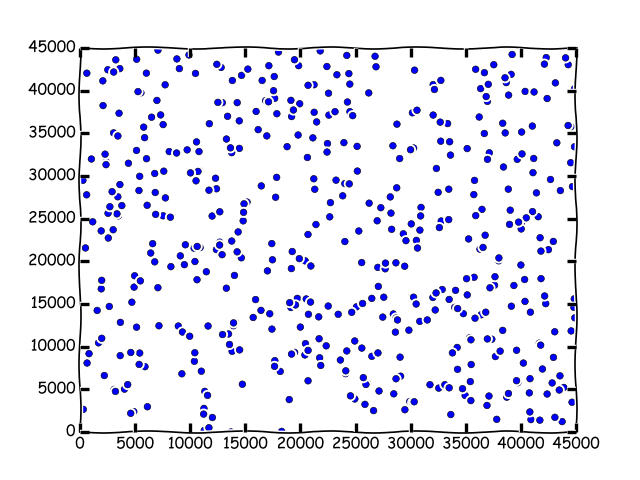

In [8]:
fig_rnd_points, ax_rnd_points = plt.subplots()

def graph_random_points(a, c, m):
    cg = congruential_generator(seed=623, a=a, c=c, m=m)
    data = random_sequence(cg, 1000)

    points = np.array(data).reshape(2, 500)
    ax_rnd_points.clear()
    ax_rnd_points.plot(points[0], points[1], 'bo')
    display(fig_rnd_points)

interact(graph_random_points, a=widgets.IntSlider(min=1, max=4701, step=1, value=67),
                              c=widgets.IntSlider(min=1, max=10, step=1, value=4),
                              m=widgets.IntSlider(min=1, max=65536, step=1, value=44987));

Which is the quality of pseudorandom numbers generating using this technique? First of all, note that once the seed has been fixed the recurrence relation is completely deterministic, and this means that after at most $m-1$ elements the sequence will generate already produced elements, thus repeating itself. This will exactly be the case, for instance, when $a=3$, $c=2$, $m=19$, and the seed is equal to $1$:

In [9]:
cg = congruential_generator(seed=1, a=3, c=2, m=19)
print random_sequence(cg, 20)

[5, 17, 15, 9, 10, 13, 3, 11, 16, 12, 0, 2, 8, 7, 4, 14, 6, 1, 5, 17]


In general, however, the sequence will start repeating after a shorter number of iterations, which we will designate as the _period_ of the generator. For instance, if $a=13$, $c=1$, $m=19$, and the seed equals $14$ we will have

In [10]:
cg = congruential_generator(seed=14, a=13, c=1, m=20)
print random_sequence(cg, 5)

[3, 0, 1, 14, 3]


thus the generator will have a period equal to 4. In general, there are three main distinctive properties that drive the choice of the parameters of a congruential generator:

1. the set of generated pseudorandom values should be undistinguishable from an analogous sample drawn from a discrete uniform distribution over  $\{0, \dots, m-1\}$;
2. its period should be as higher as possible;
3. its computer implementation should be efficient.

Concerning the first point, the following theorem gives some tools in order to find generators with high period.

**Theorem** [Knuth, 1981] A mixed congruential generator has full period for all seed values if and only if:

1. $m$ and $c$ are relatively prime,
2. $a-1$ is divisible by all prime factors of $m$,
3. $a-1$ is divisible by $4$ if $m$ is divisible by 4.

**Theorem** [Ripley, 1987] A congruential generator has period $m-1$ only if $m$ is prime. When $m-1$ is prime, the period is a divisor of $m-1$, and it is precisely $m-1$ when $a$ is a _primitive root_ of m, that is $a \neq 0$ and $a^{(m-1)p}$ is not congruential to 1 modulo $m$ for each prime factor $p$ of $m-1$.

For instance, [Park and Miller, 1988] shows that when $m$ is the Mersenne's prime $2^{31}-1$, one of its primitive root is $a = 7^5$, thus the recurrence relation $x_{i+1} = 7^5 x_i \mod 2^{31}-1$ will have a full period. 

Note that a high period _per se_ does not tell us anything about the quality of its generator: consider for instance the trivial generator obtained by setting $x_{i+1} = x_i + 1\mod m$ which has maximum period $m-1$ for any value of $m$. Such a generator would be useless because of the _predictability_ of the unseen part of a pseudorandom sequence: each item is the successor of previous element _modulo_ $m$. This is why a good generator should guarantee the first two above mentioned requirements: the first one requires the generator to output a sequence of values difficult to predict, and the second one requires that this sequence be as long as possible. Finally, the third requirement deals with parameters allowing an efficient implementation of the corresponding generators in a computer: for instance, the previous choice of $m = 2^{31}-1$ allows to store each of the produced values in a 32-bit CPU register.

How can we check the first requirement of unpredictability of the generated pseudorandom sequence? A procedure suggested in [Ripley, 1987] consists in verifying that there is a small dependency between successive elements in the sequence, for instance plotting in a bidimensional plane a set of points whose $X$ coordinates have been obtained by the pseudorandom generator, and the $Y$ coordinates are simply the $X$ ones rotated by one item, say on the left. The following panel allow to browse for specific values of $a$, $c$, and $m$ generating patterns that suggest a low independence between successive items generations. A lazy user can check for bad known configurations clicking on the corresponding buttons.

<IPython.core.display.Javascript object>


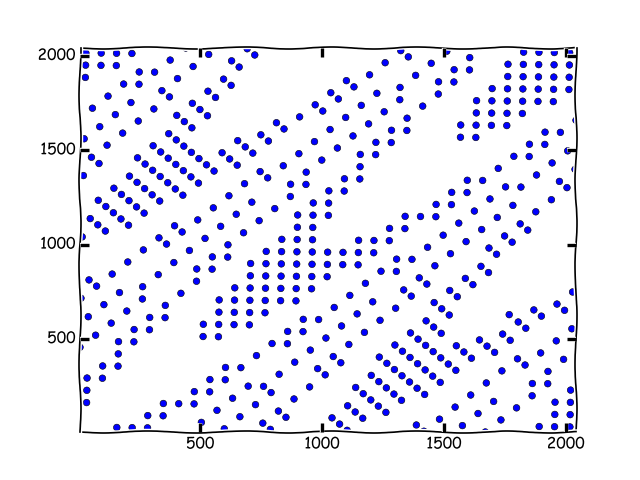

In [11]:
def rotate_left(l):
    return l[1:] + l[:1]

label_a = widgets.Label('a')
text_a = widgets.IntText(65)
label_c = widgets.Label('c')
text_c = widgets.IntText(1)
label_m = widgets.Label('m')
text_m = widgets.IntText(2048)
label_seed = widgets.Label('seed')
text_seed = widgets.IntText(1396)

parameters = ((6, 1, 16, 0),
              (65, 1, 2048, 0),
              (1365, 1, 2048, 0),
              (157, 1, 2048, 0),
              (45, 0, 2048, 1),
              (43, 0, 2048, 1))

l = widgets.Layout(width='30%', height='3em')

choices = [widgets.Button(description='a={}, c={}, m={}, seed={}'.format(*p),
                          layout=l)
           for p in parameters]

fig_badvals, ax_badvals = plt.subplots()

def update_bad_val(a, c, m, seed):
    cg = congruential_generator(seed=seed, a=a, c=c, m=m)
    data = random_sequence(cg, 500)
    
    clear_output()
    ax_badvals.clear()
    ax_badvals.plot(data, rotate_left(data), 'bo')
    plt.xlim(min(data), max(data))
    plt.ylim(min(data), max(data))

    display(fig_badvals)

for c, p in zip(choices, parameters):
    c.on_click(lambda b: update_bad_val(*p))

interact(update_bad_val, a=text_a, c=text_c, m=text_m, seed=text_seed)

display(widgets.VBox((widgets.HBox((choices[:3])),
                      widgets.HBox((choices[3:])))))


Another mathematical tool which can be used in order to assess the goodness of a congruential generator is the _empirical c.d.f._, which associates a sample with an approximation of the c.d.f of the distribution from which the sample has been drawn. Formally, given a sample $\{ x_1, \dots, x_m \}$ drawn from a distribution whose c.d.f. is $F$, the empirical c.d.f. is defined as

$$
\hat F(x) = \frac{1}{m} \sum_{i=1}^m \mathrm I_{(-\infty, x]}(x_i)
$$

<IPython.core.display.Javascript object>


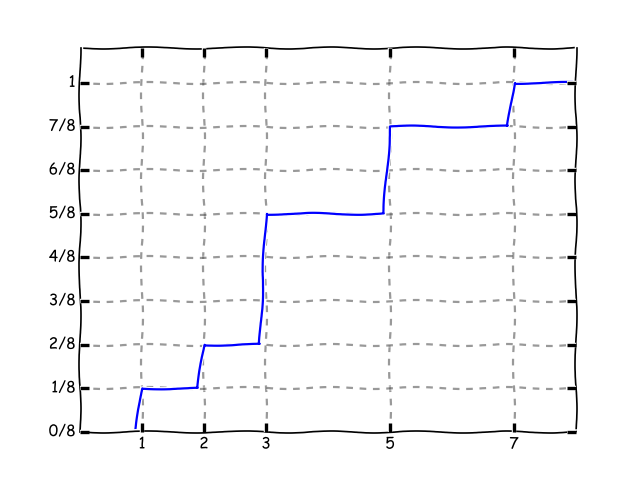

In [12]:
def clean_ecdf(data):
    return lambda x: sum([1. if d <= x else 0. for d in data]) / len(data)

data = [3, 5, 7, 2, 3, 1, 5, 3]

x_ecdf = np.arange(0, 10, 0.1)
y_ecdf = map(clean_ecdf(data), x_ecdf)

plt.figure()
plt.ylim(0, 1.1);
plt.xlim(0, max(data)+1)
plt.xticks(list(set(data)));
plt.yticks([float(i)/len(data) for i in range(len(data))] + [1],
           ['{}/{}'.format(i, len(data)) for i in range(len(data))] + [1]);

for d in set(data):
    plt.plot([d, d], [0, 1.1], 'k--', alpha=.4)

for i in np.array(range(len(data)+1)) / float(len(data)):
    plt.plot([0, max(data)+1], [i, i], 'k--', alpha=.4)

plt.plot(x_ecdf, y_ecdf);

It is easy to see that an empirical c.d.f. is a step function and each step starts precisely at one observation, raising the graph of a quantity equal to the number of times that observation occur in the sample, divided by the total number of observations. A theoretical result known as the Glivenko-Cantelli theorem, which we will discuss in the lecture about hypothesis testing, ensures that if $\hat F$ has been computed using a sample of size $n$ drawn from a distribution whose c.d.f. is $F$, when $n$ increases $\hat F$ converges in probability to $F$.

In [13]:
def ecdf(data):
    sorted = np.sort(data)
    yvals = np.arange(len(sorted))/float(len(sorted))
    return((sorted, yvals))

<IPython.core.display.Javascript object>


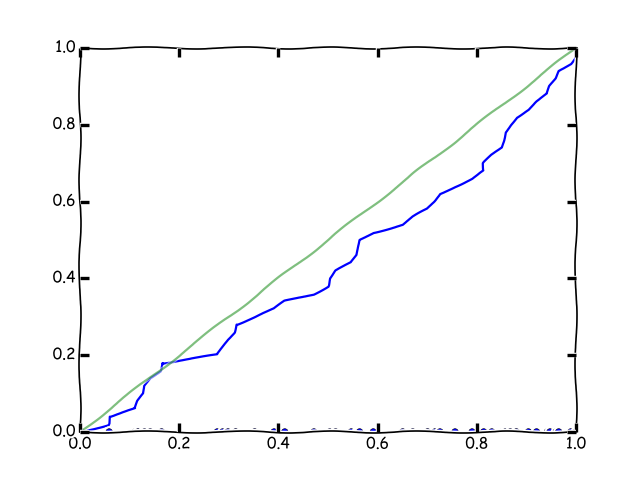

In [15]:
def one_ecdf(num_points):
    fig_1_ecdf, ax_1_ecdf = plt.subplots()
    
    cg = congruential_generator(seed= 7325, a=7**5, c=1, m=2**31-1)
    data = random_sequence(cg, num_points)

    x_ecdf, y_ecdf = ecdf(data)
    ax_1_ecdf.plot(x_ecdf / float(max(x_ecdf)), y_ecdf)
    ax_1_ecdf.plot(x_ecdf / float(max(x_ecdf)), [0]*num_points, 'bo')
    ax_1_ecdf.plot((0, 1), (0, 1), 'g', alpha=0.5)

interact(one_ecdf, num_points=widgets.IntText(min=10, max=1000, value= 50));

<IPython.core.display.Javascript object>


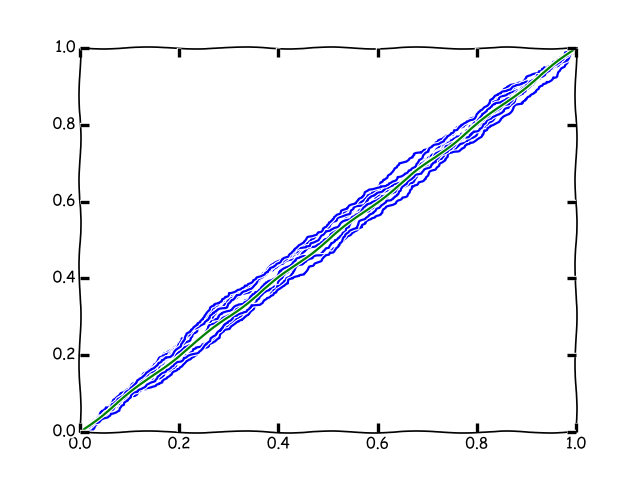

In [16]:
def more_ecdf(num_points):
    fig_more_ecdf, ax_more_ecdf = plt.subplots()
    
    cg = congruential_generator(seed= 7325, a=7**5, c=1, m=2**31-1)
    data = random_sequence(cg, num_points*10)
    
    for d in np.array(data).reshape(10, num_points):
        x_ecdf, y_ecdf = ecdf(d)
        ax_more_ecdf.plot(x_ecdf / float(max(x_ecdf)), y_ecdf, 'b')
     
    ax_more_ecdf.plot((0, 1), (0, 1), 'g')

interact(more_ecdf, num_points=widgets.IntText(min=10, max=1000, value= 500));

### Bit-shift register generators

Bit-shift registers are pseudorandom generators based on an update equation similar to that of congruential generators:

$$
b_i = (a_1 b_{i-1} + \dots + a_d b_{i-d}) \mod 2
$$

where $a_i, b_i \in \{ 0, 1 \}$ for each $i$, so that this generator outputs pseudorandom bits. If for instance we set $d=2$ and $a_1 = a_2 = 1$ the update formula becomes $b_i = (b_{i-1} + b_{i-2}) \mod 2$, whose corresponding truth table is the following:

| $b_{i-2}$ | $b_{i-1}$ | $b_i$ |
|-----------|-----------|-------|
| 0         | 0         | 0     |
| 0         | 1         | 1     |
| 1         | 0         | 1     |
| 1         | 1         | 0     |

Thus $b_i = b_{i-1} \oplus b_{i-2}$, where $\oplus$ denotes the exclusive or operator. Analogously, the generic update formula for a bit-shift register generator is equivalent to $b_i = b_{i-j_1} \oplus \dots \oplus b_{i-j_l}$, where $j_1, \dots, j_l$ are the indices corresponding to all non-null values of the multipliers in the original definition for the generator, that is $a_{j_1} = \dots = a_{j_l} = 1$. Therefore, this kind of generator can be easily realized in hardware using XOR gates and shift registers (that is, special registers outputting their current value before the latter gets modified). For instance, the next cell shows the circuit corresponding to the generator of previous example.

![Logic circuit for a simple shift register generator](img/shift-register-generator.png)
<center>**Logic circuit for the proposed bit-shift register generator**</center>

In [22]:
def bit_shift_generator(seed, indices):
    curr_bits = seed
    while True:
        new_bit = reduce(lambda a, b: a^b,
                         [curr_bits[i] for i in indices], 0)
        curr_bits = curr_bits[1:] + [new_bit]
        yield new_bit

In [23]:
bsg = bit_shift_generator([1, 0, 0, 1, 1, 0, 1, 1], (1, 4, 7))
random_sequence(bsg, 10)

[0, 0, 0, 0, 0, 1, 0, 0, 0, 1]

Once a pseudorandom bit sequence has been generated, it is possible to transform it into a reasonable pseudorandom number uniform over $[0, 1]$ interpreting a suitable subsequence as the corresponding binary expansion. In order to avoid to generate too high a number of pseudorandom bits, the so-called Tausworthe generator allow for partial overlapping in the binary expansion of two successive generated values. Precisely, for $L, t \in \mathbb N$, the $i$-th generated value will be

$$
u_i = \sum_{s=1}^L 2^{-s} b_{it+s}
$$

In [24]:
def tausworthe_generator(t, L):
    random_bits = random_sequence(bsg, 1000)
    i = 0
    while True:
        yield sum([b*e for b, e in zip(random_bits[i*t+1: i*t+L],
                                       [2**-j for j in np.arange(1, L+1)])])
        i += 1

tg = tausworthe_generator(13, 5)
random_sequence(tg, 15)

[0.625,
 0.1875,
 0.0625,
 0.4375,
 0.0,
 0.25,
 0.6875,
 0.875,
 0.75,
 0.25,
 0.3125,
 0.5,
 0.3125,
 0.375,
 0.1875]

## Applications: Monte Carlo methods

The term Monte Carlo refers to a wide family of estimation methods based on the use of pseudorandom numbers. The basic idea beneath this kind of methods is well described by the anndedoct describing its discovery on part of Stan Ulam, an ungarian mathematician who, playing a card solitaire while recovering from an encephalitis, wondered about the probability of dealing a specific, nontrivial hand from a shuffled deck. As he couldn't get the result through combinatorics, Ulam noticed that an approximation of the probability value could be easily found: it was sufficient to repeatedly shuffle the deck and compute the frequency of time that the desired card configuration appeared.

Although on that time this idea did not result in any application, when some years later Ulam was involved in the design of nuclear weapons at the Los Alamos National laboratories, the studies he was conducting with John Von Neumann and Nicholas Metropolis required to estimate the distribution of distances traveled by neutrons during a fission experiment. His early intuition could now be applied to a real-world problem: it just sufficed a bunch of random values. Those values could have been found in tables commonly used at that time, byt the availability the ENIAC computer suggested John Von Neumann to simulate the extraction of such numbers through the middle-square method introduced at the beginning of this lecture, which he designed specifically with this purpose.

The secrecy policies of the Manhattan project required each methodelogy invented in the Los Alamos laboratories to have a code name, so Metropolis suggested «Monte Carlo», referring to the casino in Monaco frequented by Ulam's uncle.  

### Estimating $\pi$ ###

One of the most famous involving the simulation of pseudorandom values is that leading to an estimate of $\pi$. It requires to simulate the uniform distribution in a given square in order to draw points at ranodm and then chek whether or not they fall inside the circle inscribed in the square. For instance, we could consider the square $S=[-1,1]\times[-1,1]$ and denote by $C$ the circle inscribed in $S$ (that is, the circle centered in the origin and having unit radius). The following panel simulates the extraction of a point uniformly in $S$, toghether with the check of its possible inclusion in $C$.

<IPython.core.display.Javascript object>


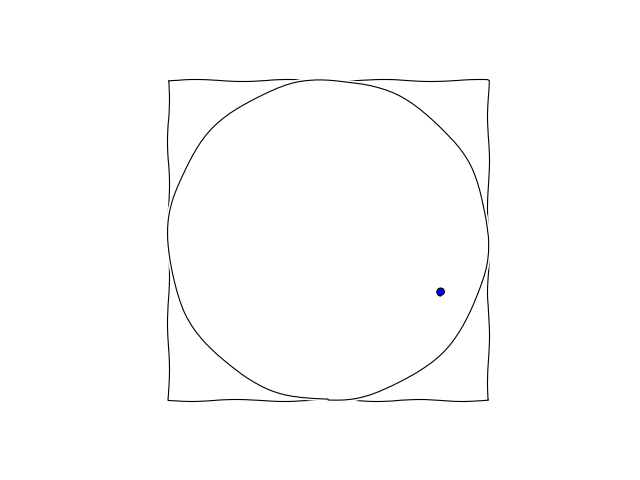

<IPython.core.display.Javascript object>


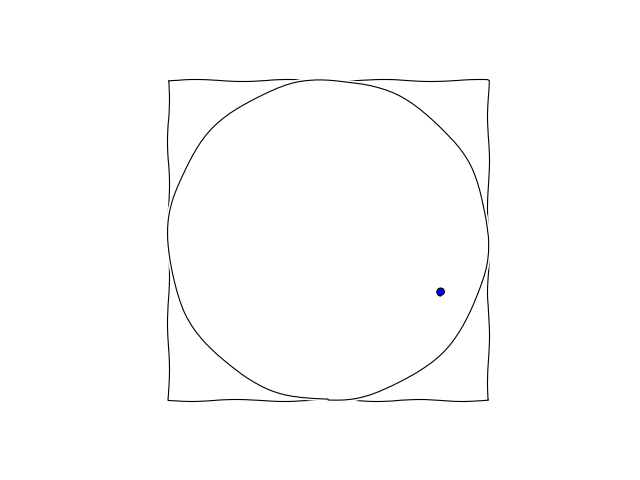

<IPython.core.display.Javascript object>


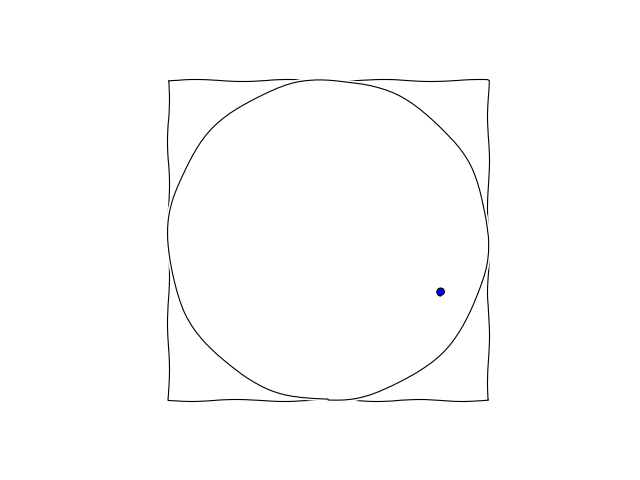

In [38]:
fig_in_circle, ax_in_circle = plt.subplots()

button_in_circle = widgets.Button(description="Simulate")
label_in_circle = widgets.Label()

def simulate_in_circle(button):
    point = random.uniform(-1, 1, 2)
    ax_in_circle.clear()
    ax_in_circle.add_patch(patches.Rectangle((-1, -1), 2, 2, fill=False))
    ax_in_circle.add_patch(patches.Circle((0, 0), 1, fill=False))
    ax_in_circle.add_patch(patches.Circle(point, .02))
    ax_in_circle.set_aspect('equal', 'datalim')
    plt.xlim(-1.2, 1.2)
    plt.ylim(-1.2, 1.2)
    plt.axis('off')
    label_in_circle.value = 'I\'m in' if point.dot(point) < 1 else 'I\'m out'
    display(fig_in_circle)
    

button_in_circle.on_click(simulate_in_circle)
simulate_in_circle(button_in_circle)

widgets.HBox((button_in_circle, label_in_circle))

The use of a uniform distribution insures that the probability of drawing a point $x$ falling inside $C$ equals the ratio between the areas of $C$ and $S$, that is

$$
\mathrm P(x \in C) = \frac{\text{area of } C}{\text{area of } S} = \frac{\pi}{4}
$$

If we repeat this experiment $n$ times, counting the number of times we obtain a point contained in $C$ will give rise to a random value E distributed according to a binomial law having $n$ and $\pi/4$ as parameters, whose average accounts to $n/4 \pi$. This suggests us a simple scheme for obtaining an estimate of $\pi$: simulate $n$ times the extraction of a point, denote by $e$ the number of times the generated point falls inside the circle, and use this observed value as an approximation of the average of $E$, thus getting to

$$
\pi \approx \frac{4 e}{n}
$$

You can try it yourself in the following panel: enter the number $n$ of experiments and click _Simulate_ in order to see the corresponding estimate of $\pi$. Note that this estimate changes even if $n$ is left unchanged, as we should expect because of the points starting the simulation process are re-generated each time.

In [26]:
def sim_pi(num_points):
    data = random.uniform(-1, 1, num_points*2).reshape(num_points, 2)
    e = np.array(map(lambda p: 1 if np.array(p).dot(p)<1 else 0, data)).mean()
    return e*4

interact(sim_pi, num_points=widgets.IntText(min=10, max=1000, value=10));

3.6000000000000001

How accurate is the estimate we can obtain for a fixed value of $n$? The following panel show the histogram summarinzing the distribution of 500 different estimates of $\pi$, allowing to verify that the generated values are spread around $\pi$ and their dispersion gets smaller as n increases.

<IPython.core.display.Javascript object>


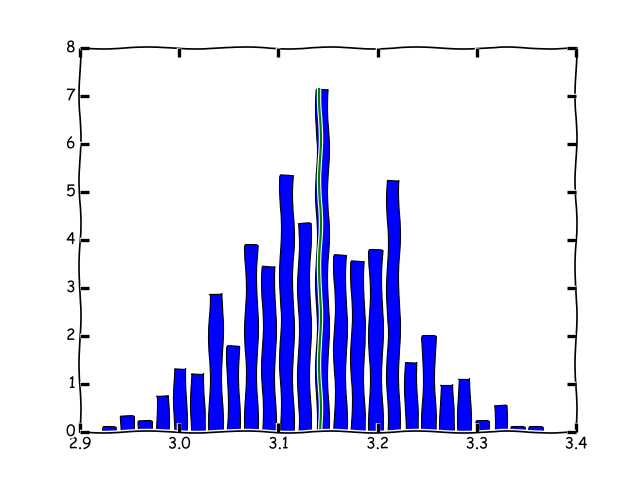

In [27]:
fig_pi_hist, ax_pi_hist = plt.subplots()

def sim_pi_hist(num):
    data = [sim_pi(500) for i in range(num)]
    
    hist, bins = np.histogram(data, bins=25, density=True)
    width = 0.7 * (bins[1] - bins[0])
    center = (bins[:-1] + bins[1:]) / 2
    ax_pi_hist.clear()
    ax_pi_hist.bar(center, hist, align='center', width=width)
    ax_pi_hist.plot((math.pi, math.pi), (0, max(hist)), 'g')
    display(fig_pi_hist)

interact(sim_pi_hist, num=widgets.IntText(min=10, max=1000, value= 500));

We can also address this question in a more quantitative way. For instance, we could be interested in finding a how big should be $n$ in order to be confident that the estimate of $\pi$ is correct up to its $k$-th sifnificative digit. An answer to this query can be found through application of the weak law of large numbers, whose applicaiton to the random variable $E$ ensures that

$$
\mathrm P\left( \left| \frac{E}{b} - \frac{\pi}{4} \right| \geq \epsilon \right)
\leq \frac{\sigma^2}{n \epsilon^2}
$$

where $\sigma^2$, denoting the variance of the event "a point uniformely drawn in $S$ falls within $C$", equals $\frac{\pi}{4} \left(1-\frac{\pi}{4}\right)$. Starting from

$$
\mathrm P\left( \frac{\left| \frac{E}{b} - \frac{\pi}{4} \right|}{\frac{\pi}{4}} \geq \epsilon \right) =
\mathrm P\left( \left| \frac{E}{b} - \frac{\pi}{4} \right| \geq \frac{\pi}{4} \epsilon \right)
\leq \frac{\sigma^2}{n \epsilon^2} \left( \frac{4}{\pi} \right)^2,
$$

we obtain

$$
\mathrm P\left( \frac{\left| \frac{E}{b} - \frac{\pi}{4} \right|}{\frac{\pi}{4}} \leq \epsilon \right) \geq
1 - \frac{\sigma^2}{n \epsilon^2} \left( \frac{4}{\pi} \right)^2 =
1 - \frac{1}{n\epsilon^2} \left( \frac{4}{\pi} - 1 \right).
$$

We are now ready to answer our original question: the ratio

$$
\frac{\left| \frac{E}{b} - \frac{\pi}{4} \right|}{\frac{\pi}{4}}
$$

is the _relative error_ of the random variable denoting our estimate, and its magnitude denotes the first digit where approximation starts taking place. Thus, letting $\epsilon = 10^{-k}$ we obtain

$$
\mathrm P\left( \frac{\left| \frac{E}{b} - \frac{\pi}{4} \right|}{\frac{\pi}{4}} \leq 10^{-k} \right) \geq
1 - \frac{10^{2k}}{n} \left( \frac{4}{\pi} - 1 \right).
$$

The following panel shows how this probability scales with $k$ for different magnitudes of $n$, essentially confirming the fact that even using a high number of simulations it is only possible to approximate $\pi$ up to a relatively small number of significant digits.

In [39]:
class FancyTable():
    def __init__(self, data, headers=None, formats=None):
        self.data = data
        self.headers = headers
        self.formats = formats if formats else [''] * len(data[0])
    
    def _repr_html_(self):
        html = ['<table width="100%"']
        if self.headers:
            html.append('<tr>')
            for h in self.headers:
                html.append('<th>{}</th>'.format(h))
            html.append('</tr')
        for row in self.data:
            html.append('<tr>')
            for col, f in zip(row, self.formats):
                col_text = '<td>{:{}}</td>'.format(col, f)
                html.append(col_text)
 
            html.append('</tr>')
        html.append('</table>')
        return '\n'.join(html)

def prob(k, n):
    return max((0, 1 - 10**(2.*k)/n*(4/math.pi - 1)))

def show_pi_precision(d):
    data = [(k, prob(k, 10**d)) for k in range(0, 7)]
    table = FancyTable(data, headers=('<i>k</i>', 'P(<i>k</i>)'), formats=('d', '0.3f'))
    return table

interact(show_pi_precision,
         d=widgets.IntSlider(min=1, max=9, step=1, value=2));


k,P(k)
0,0.997
1,0.727
2,0.000
3,0.000
4,0.000
5,0.000
6,0.000


This kind of tables aswer only indirectly to our original question: if we fix a value for $n$ we can obtain the probability of obtaining an error in the estimate on a given digit. If we want to get a direct answer we need to fix a confidence for the answer itself: let $\delta$ denote the desired confidence level, so that

$$
\mathrm P\left( \frac{\left| \frac{E}{b} - \frac{\pi}{4} \right|}{\frac{\pi}{4}} \leq 10^{-k} \right) \geq
1 - \frac{10^{2k}}{n} \left( \frac{4}{\pi} - 1 \right) \geq 1 - \delta,
$$

solving the latter inequality on $n$ we obtain

$$
n \geq \left( \frac{4}{\pi} - 1 \right) \frac{1}{\delta} 10^{2k}.
$$

The following panel computes the minimal value of $n$ according this formula for the first six digits after the decimal comma, allowing to specify different confidence levels.

In [40]:
def pi_n_value(k, delta):
    return int(math.ceil(1. / delta * 10**(2*k) * (4./math.pi - 1)))

def show_pi_n_value(delta):
    data = [(k, pi_n_value(k, delta)) for k in range(0, 7)]
    table = FancyTable(data, headers=('<i>k</i>', '<i>n</i>(<i>k</i>)'), formats=('d', ',d'))
    return table

interact(show_pi_n_value,
         delta=widgets.FloatSlider(min=.1, max=1, step=.1, value=.2));

k,n(k)
0,2
1,137
2,"13,662"
3,"1,366,198"
4,"136,619,773"
5,"13,661,977,237"
6,"1,366,197,723,676"


## A challenge: Estimating $\pi$, again

Another procedure aiming at estimating $\pi$ via a simulation process is known as the Bouffon needle problem, which students are challenged to implment (see for instance [a demo](http://demonstrations.wolfram.com/BuffonsNeedleProblem/) or [a paper](http://www.mathematica-journal.com/issue/v11i1/contents/BuffonsNeedle/BuffonsNeedle.pdf) describing the problem).

## Estimating $\mathrm e$ ##

Consider an infinite sequence $U_1, \dots, U_n, \dots$  of random variables uniformly distributed on $[0,1]$, and denote by $N$ the random variable having as specification the index $n$ such that $u_n$ is the first value in the above sequence being bigger than its successor. Formally:

$$
N = \min \{ n \text{ such that } n \geq 2 \text{ and } U_n \geq U_{n-1} \}.
$$

The probability that $N$ is greater of a given value $n$ is

$$
\mathrm P(N > n) = \mathrm P(U_1 \geq U_2 \geq \dots \geq U_n) = \frac{1}{n!},
$$

because we are considering a given ordering of $U_1, \dots, U_n$ over the $n!$ possible ones. This allows us to compute the probability function of $N$ as

$$
\mathrm P(N = n) = \mathrm P(N > n-1) - \mathrm P(N > n) = \frac{n-1}{n!}.
$$

Thus the expected value of $N$ will be

$$
\mathrm E(N) = \sum_{n=2}^{+\infty}n \frac{n-1}{n!} =
\sum_{m=0}^{+\infty}\frac{1}{m!} = \mathrm e.
$$

It is therefore possible to get an estimate of e simulating a sample drawn from $N$ and computing its sample average, as done in the following panel.

In [41]:
def get_us_for_e():
    u, u_next = random.random(), random.random()
    data = [u, u_next]
    while u_next < u:
        u = u_next
        u_next = random.random()
        data.append(u_next)
        
    return np.array(data)

def show_us_for_e(button):
    data = get_us_for_e()
    table = RandomTable([data], format='0.3f')
    clear_output()
    display(table)

button_generate_us_for_e = widgets.Button(description='Simulate')
button_generate_us_for_e.on_click(show_us_for_e)
show_us_for_e(button_generate_us_for_e)

display(button_generate_us_for_e)

u1: 0.730,u2: 0.101,u3: 0.687


In [42]:
def sim_e(num):
    return np.mean([len(get_us_for_e()) for i in range(num)])

sim_e(90)

2.6888888888888891

<IPython.core.display.Javascript object>


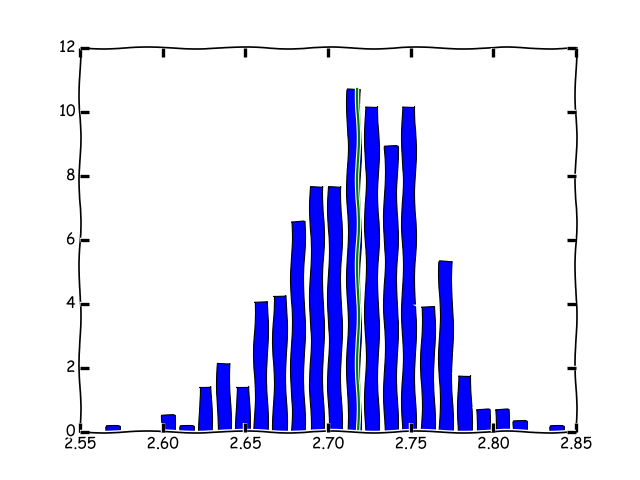

In [43]:
fig_e_hist, ax_e_hist = plt.subplots()

def sim_e_hist(num):
    data = [sim_e(500) for i in range(num)]
    
    hist, bins = np.histogram(data, bins=25, density=True)
    width = 0.7 * (bins[1] - bins[0])
    center = (bins[:-1] + bins[1:]) / 2
    ax_e_hist.clear()
    ax_e_hist.bar(center, hist, align='center', width=width)
    ax_e_hist.plot((math.e, math.e), (0, max(hist)), 'g')
    display(fig_e_hist)

interact(sim_e_hist, num=widgets.IntText(min=10, max=1000, value=500));

## Approximation of integrals ##



<IPython.core.display.Javascript object>


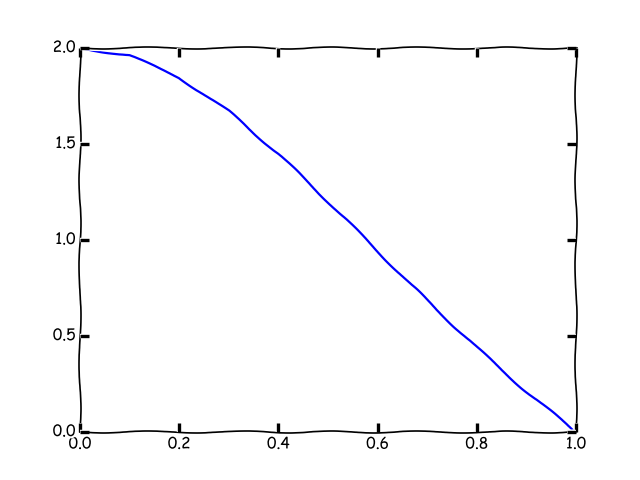

In [47]:
%matplotlib notebook

def g(u):
    return 2 * (1 - u**2)/(1 + u**2)

plt.figure()
x = np.arange(0, 1.1, .1)
y = g(x)
plt.plot(x, y);

In [49]:
from sympy import integrate, Symbol, N
u = Symbol('u')
expr = 2 * (1 - u**2)/(1 + u**2)
result = integrate(expr, u)

print result

-2*u + 4*atan(u)


In [50]:
integral_val =  N(result.subs(u, 1) - result.subs(u, 0))
print integral_val

1.14159265358979


In [51]:
import scipy.integrate as integrate
integrate.quad(lambda x: expr.subs(u, x), 0 , 1)

(1.1415926535897931, 1.2674224487583187e-14)

<IPython.core.display.Javascript object>


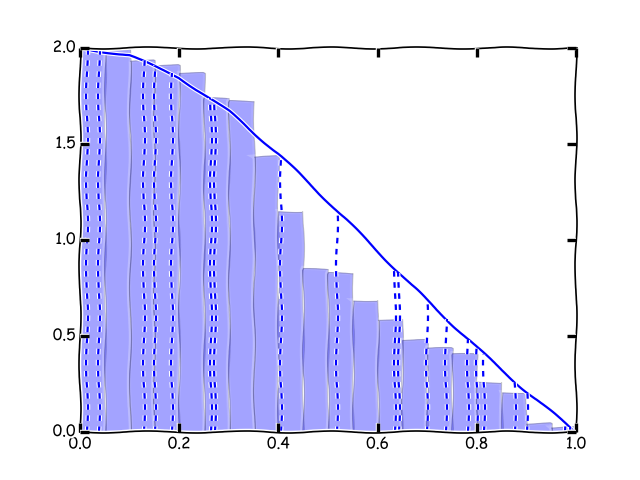

In [52]:
fig_appr_int, ax_appr_int = plt.subplots()

label_appr_int = widgets.Label()

def show_int_approx(n):
    points = np.sort(random.random(n))
    vals = [expr.subs(u, p) for p in points]
    ax_appr_int.clear()
    ax_appr_int.plot(x, y)
    for p, v in zip(points, vals):
        ax_appr_int.add_line(plt.Line2D((p, p), (0, v), dashes=(5, 5)))
    for p, i in zip(points, np.arange(n)/float(n)):
        ax_appr_int.add_patch(patches.Rectangle((i, 0), float(1)/n, expr.subs(u, p), alpha=.2))
    display(fig_appr_int)
    label_appr_int.value = 'Approximate value: {}, actual value: {}'.format(np.mean(vals), integral_val)

interact(show_int_approx, n=widgets.IntText(min=10, max=500, value=20))
display(label_appr_int)
    

<IPython.core.display.Javascript object>


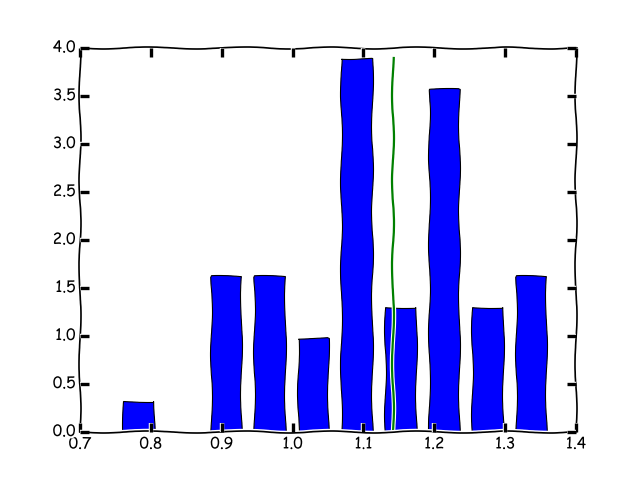

In [53]:
def appr_integral(n, g):
    points = np.sort(random.random(n))
    return np.mean(map(g, points))

fig_int_hist, ax_int_hist = plt.subplots()

def sim_int_hist(num):
    g = lambda p: float(expr.subs(u, p))
    data = [appr_integral(num, g) for i in range(50)]
    
    hist, bins = np.histogram(data, density=True)
    width = 0.7 * (bins[1] - bins[0])
    center = (bins[:-1] + bins[1:]) / 2
    ax_int_hist.clear()
    ax_int_hist.bar(center, hist, align='center', width=width)
    ax_int_hist.plot((integral_val, integral_val), (0, max(hist)), 'g')
    display(fig_int_hist)

interact(sim_int_hist, num=widgets.IntText(min=10, max=1000, value= 20));

### Exercise ###

Approximate the value of the following integrals:


$$
\int_0^1 \frac{\sin x}{x} \mathrm d x
$$

$$
\int_0^1 \mathrm e^{x^2} \mathrm d x
$$

$$
\int_0^1 \frac{\log x}{1 + x} \mathrm d x
$$

$$
\int_0^1 \cos x^2 \mathrm d x
$$

This technique can be applied also when the integration domain %I% is not $[0, 1]$ Consider for instance the case $T = [a, b]$, and apply the substitution $y = \frac{x - a}{b - a}$: the integral becomes

$$
\int_a^b g(x) \mathrm d x = \int_0^1 g(a + y (b - a)) (b - a) \mathrm d y =: \int_0^1 h(y) \mathrm d y,
$$

so that it is possible to compute an approximation of the integral of $g$ applying the Monte Carlo technique to $h$. Analogously, integrals of the form

$$\int_0^{+\infty} g(x) \mathrm d x $$

can be approximated applying the transformation $y = \frac{1}{x+1}$:

$$
\int_0^{+\infty} g(x) \mathrm d x =
\int_0^1 g\left(\frac{1}{y} - 1\right) \frac{1}{y^2} \mathrm d y =:
\int_0^1 h(y) \mathrm d y
$$

<IPython.core.display.Javascript object>


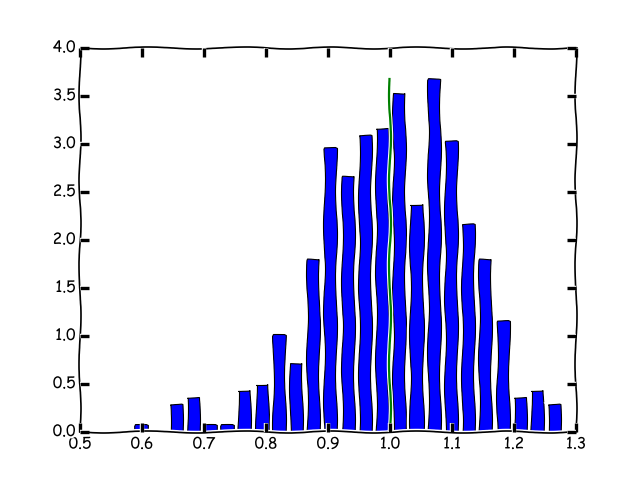

In [54]:
fig_int_2_hist, ax_int_2_hist = plt.subplots()

def sim_int_2_hist(num):
    g = lambda x: math.e ** -x
    h = lambda y: g(1/y-1)/y**2
    data = [appr_integral(num, h) for i in range(500)]
    
    hist, bins = np.histogram(data, bins=25, density=True)
    width = 0.7 * (bins[1] - bins[0])
    center = (bins[:-1] + bins[1:]) / 2
    ax_int_2_hist.clear()
    ax_int_2_hist.bar(center, hist, align='center', width=width)
    ax_int_2_hist.plot((1, 1), (0, max(hist)), 'g')
    display(fig_int_2_hist)

interact(sim_int_2_hist, num=widgets.IntText(min=10, max=1000, value= 20));

### Exercise ###

Rewrite each of the following intervals in order to approximate them via the Monte Carlo technique:

$$
\int_{-\infty}^{+\infty} g(x) \mathrm d x
$$

$$
\int_{a}^{+\infty} g(x) \mathrm d x
$$

$$
\int_{-\infty}^{b} g(x) \mathrm d x
$$

## Bibliographic references ##

[Lehmer, 1951] Derrick H. Lehmer, D. Mathematical methods in large-scale computing units. In Proc. 2nd Symp. on Large-Scale Digital Calculating Machinery (pp. 141-146). Harvard Univ. Press, New York, 1951

[Knuth, 1981] Donald E. Knuth. The Art of Computer Programming, Volume II: Seminumerical Algorithms. Addison-Wesley Professional, 1981

[Park and Miller, 1988] Stephen K. Park and Keith W. Miller. Random Number Generators: Good Ones Are Hard To Find. Communications of the ACM. 31 (10): 1192–1201. 1988 (doi:10.1145/63039.63042)

[Ripley, 1987] Brian B. Ripley. Stochastic Simulation. John Wiley & Sons, 1987

[Rotenberg, 1960] A. Rotenberg. A new pseudo-random number generator. Journal of the ACM, 7 (1): 75-77. 1960
